In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import collections
from scipy.stats import ranksums

In [100]:
def placeholder(x):
  return 1, "kek"

def G1(x):
    value = 5*x[0] + 5*x[1] + 5*x[2] + 5*x[3]
    for i in range(4):
      value -= 5*(x[i]**2)
    for i in range(4,13):
      value -= x[i]
    return value

def constraintsG1(x):
    n = 9
    cal = 1
    fc = "missing constraints: "
    if (not(2*x[0] + 2*x[1] + x[9] + x[10] <= 10)):
      cal -= 1/n
      fc += "1,"
    if(not(8*x[0] + x[9] <= 0)):
      cal -= 1/n
      fc += "2,"
    if(not(-2*x[3] - x[4] + x[9] <= 0)):
      cal -= 1/n
      fc += "3,"
    if(not(2*x[0] + 2*x[2] + x[9] + x[11] <= 0)):
      cal -= 1/n
      fc += "4,"
    if(not(-8*x[1] + x[10] <= 0)):
      cal -= 1/n
      fc += "5,"
    if(not(-2*x[5] - x[6] + x[10] <= 0)):
      cal -= 1/n
      fc += "6,"
    if(not(2*x[1] + 2*x[2] + x[10] + x[11] <= 10)):
      cal -= 1/n
      fc += "7,"
    if(not(8*x[2] + x[11] <= 0)):
      cal -= 1/n
      fc += "8,"
    if(not(-2*x[7]-x[8] + x[11] <= 0)):
      cal -= 1/n
      fc += "9"
    return cal, fc


def G4(x):
    return 5.3578547*(x[2]**2) + .8356891*x[0]*x[4] + 37.293239*x[0] - 30792.141

def constraintsG4(x):
    n = 3
    cal = 1
    fc = "missing constraints: "
    val = 85.334407 + 0.0056858*x[1]*x[4] + .00026*x[0]*x[3] - .0022053*x[2]*x[4]
    if(not(0 <= val and val <= 92)):
      cal -= 1/n
      fc += "1,"
    val = 80.51249+.0071317*x[1]*x[4]+.0029955*x[0]*x[2]+.0021813*(x[2]**2)
    if(not(90 <= val and val <= 110)):
      cal -= 1/n
      fc += "2,"
    val = 9.300961+.0047026*x[2]*x[4]+.0012547*x[0]*x[2]+.0019085*x[2]*x[3]
    if(not(20 <= val and val <= 25)):
      cal -= 1/n
      fc += "3"
    return cal, fc


def G5(x):
    return 3*x[0] + .000001*(x[0]**3) + 2*x[1] + .000002/(3*(x[1]**3))

def constraintsG5(x):
    n = 5
    cal = 1
    fc = "missing constraints: "
    if(not(x[3] - x[2] + .55 >= 0)):
      cal -= 1/n
      fc += "1,"
    if(not(x[2] - x[3] >= 0)):
      cal -= 1/n
      fc += "2,"
    if(not(1000*math.sin(-x[2] - .25)+1000*math.sin(-x[3]-.25)+894.8-x[0] == 0)):
      cal -= 1/n
      fc += "3,"
    if(not(1000*math.sin(x[2] - .25)+1000*math.sin(x[2]-x[3]-.25)+894.8-x[1] == 0)):
      cal -= 1/n
      fc += "4,"
    if(not(1000*math.sin(x[3] - .25)+1000*math.sin(x[3]-x[2]-.25)+1294.8 == 0)):
      cal -= 1/n
      fc += "5"
    return cal, fc

def G6(x):
    return (x[0] - 10)**3 + (x[1] - 20)**3

def constraintsG6(x):
    n = 2
    cal = 1
    fc = "missing constraints: "
    if (not((x[0] - 5)**2 + (x[1] - 5)**2 - 100 >= 0)):
      cal -= 1/n
      fc += "1,"
    if(not(-(x[0] - 6)**2 - (x[1] - 5)**2 + 82.81 >= 0)):
      cal -= 1/n
      fc += "2"
    return cal, fc

In [5]:
def Real(func, cons, epochs, var, pop, lowEnd, highEnd):
    ################## Create first generation with random numbers between
    ################## lowEnd and highEnd
    population_matrix = []
    results = []
    best = [None] * epochs
    tup = [None] * pop
    i = 0
    while i < pop:
        individual = []
        for j in range(0,var):
            individual.append(random.uniform(lowEnd[j], highEnd[j]))
        ############################ Make sure the value solves some constraints
        if(cons(individual)[0] < .1):
          continue
        population_matrix.append(individual)
        results.append(None)
        i += 1
    for i in range(0,epochs):
        ################ Evaluate the function and find the results with
        ################ minimal value
        for j,val in enumerate(population_matrix):
            results[j] = (j,func(val),cons(val))
            tup[j] = (val, 0 - cons(val)[0]**(4) * func(val), cons(val), func(val))
            #print(val, " gives ", func(val))
        temp = sorted(tup, key = lambda x: x[1], reverse=True)
        best[i] = (temp[0])

        ################ Perform selection (Random selection) and then crossover (SBX)

        j = 0
        while j < int(pop/2):
            r1 = random.randint(0,pop-1)
            r2 = random.randint(0,pop-1)
            l = tup[r1][0]
            q = tup[r2][0]
            cross = SBX([l,q],lowEnd,highEnd)
            if(cons(cross[0])[0] < .1 or cons(cross[1])[0] < .1):
              continue
            population_matrix[j*2] = cross[0]
            population_matrix[j*2 + 1] = cross[1]
            j += 1

        ################ Perform mutation
        for j in range(0,pop):
            r = random.uniform(0,1)
            if(r <= .1):
                n = random.randint(0,var-1)
                population_matrix[j][n] = PM(population_matrix[j][n], 100+i, lowEnd[n], highEnd[n])

    return best



In [6]:
def SBX(parents, low, high):
    nc = 2
    u = random.uniform(0,1)
    b = 0
    if (u<=.5):
        b = (2*u)**(1/(nc + 1))
    else:
        b = (1/(2*(1-u)))**(1/(nc + 1))

    l = .5*((np.add(parents[0],parents[1])) - b*abs(np.subtract(parents[1],parents[0])))
    q = .5*((np.add(parents[0],parents[1])) + b*abs(np.subtract(parents[1],parents[0])))

    for i in range(len(l)):
      if (l[i] < low[i]):
        l[i] = low[i]
      elif (l[i] > high[i]):
        l[i] = high[i]
      if (q[i] < low[i]):
        q[i] = low[i]
      elif (q[i] > high[i]):
        q[i] = high[i]

    return l,q

def PM(value, nm, low, high):
    u = random.uniform(0,1)
    d = min(value - low, high - value)/(high - low)
    dq = 0
    if (u<=.5):
        dq = ((2*u + (1-2*u)*(1-d)**(nm+1))**(1/(nm + 1))) - 1
    else:
        dq = 1 - ((2*(1-u) + 2*(u-.5)*(1-d)**(nm+1))**(1/(nm + 1)))


    value = value + dq*(high-low)
    if (value < low):
      value = low
    elif (value > high):
      value = high

    return value

In [7]:
def DifferentialEvolution(func, cons, epochs, var, pop, lowEnd, highEnd):
    ################## Create first generation with random numbers between
    ################## lowEnd and highEnd
    population_matrix = []
    results = []
    best = [None] * epochs
    tup = [None] * pop
    i = 0
    while i < pop:
        individual = []
        for j in range(0,var):
            individual.append(random.uniform(lowEnd[j], highEnd[j]))
        ############################ Make sure the value solves some constraints
        population_matrix.append(individual)
        results.append(None)
        i += 1
    for i in range(0,epochs):
        ################ Evaluate the function and find the results with
        ################ minimal value
        for j,val in enumerate(population_matrix):
            results[j] = (j,func(val),cons(val))
            tup[j] = (val, func(val), cons(val))
            #print(val, " gives ", func(val))
        temp = sorted(tup, key = lambda x: x[1])
        best[i] = (temp[0])


        ################ Perform stochastic Ranking

        for j in range(0, 5):
          cont = 0
          for k in range(1,pop-1):
            u = random.uniform(0,1)
            if(temp[k][2][0] == temp[k-1][2][0] or u < .4):
              if(temp[k][1] < temp[k+1][1]):
                tempVar = temp[k]
                temp[k] = temp[k+1]
                temp[k+1] = tempVar
                cont = 1
            else:
              if(temp[k][2][0] < temp[k+1][2][0]):
                tempVar = temp[k]
                temp[k] = temp[k+1]
                temp[k+1] = tempVar
                cont = 1
          if(cont == 0):
            break


        ################ Perform selection (Best individuals) and then mutation and crossover

        j = 0
        while j < pop:
            r = random.randint(0,pop-1)
            l = temp[0][0]
            q = temp[1][0]
            m = temp[j-r][0]
            res = differentialMutation(l,q,m, lowEnd, highEnd)
            prob = differentialCrossover(pop)
            individual1 = []
            individual2 = []
            half = int(var/2)
            for k in range(half):
              individual1.append(l[k])
              individual2.append(res[k])
            for k in range(half, var):
              individual1.append(res[k])
              individual2.append(l[k])
            if(prob < 0 or pop < prob):
                population_matrix[j] = individual1
            else:
                population_matrix[j] = individual2
            j += 1

    return best

In [8]:
def differentialCrossover(size):
    J = 0
    j = size - 1
    for i in range(j):
        J = J and (j+1)
        j = (j+1) %size
        if(J == size):
            break
    return J


def differentialMutation(parent1, parent2, parent3, low, high):
    value = parent1 + .5*(np.subtract(parent2,parent3))
    for i in range(len(parent1)):
      if (value[i] < low[i]):
        value[i] = low[i]
      elif (value[i] > high[i]):
        value[i] = high[i]

    return value

In [91]:
def swarm(func, epochs, var, pop, lowEnd, highEnd):
    ################## Create first generation with random numbers between
    ################## lowEnd and highEnd
    swarm_matrix = []
    vel_matrix = []
    lbest = []
    gbest = []
    best = [None] * epochs
    c1 = .3
    c2 = .9
    r1 = random.uniform(0,1)
    r2 = random.uniform(0,1)
    i = 0
    while i < pop:
        individual = []
        vel = []
        for j in range(0,var):
            individual.append(random.uniform(lowEnd[j], highEnd[j]))
            vel.append(0)
        swarm_matrix.append(individual.copy())
        vel_matrix.append(vel)
        lbest.append(individual.copy())
        i += 1
    gbest = swarm_matrix[0].copy()
    for i in range(0,epochs):
        ################ Evaluate the function for each individual, update local best and global best
        for j,val in enumerate(swarm_matrix):
            if (func(swarm_matrix[j]) < func(lbest[j])):
              lbest[j] = swarm_matrix[j].copy()
              if (func(swarm_matrix[j]) < func(gbest)):
                gbest = swarm_matrix[j].copy()
            #print(val, " gives ", func(val))
        best[i] = [gbest,func(gbest)]

        ################# Update swarm
        for j, val in enumerate(swarm_matrix):
          for k in range(var):
            cog_comp = c1 * r1 * (func(lbest[j]) - swarm_matrix[j][k])
            soc_comp = c2 * r2 * (func(gbest) - swarm_matrix[j][k])
            vel_matrix[j][k] = vel_matrix[j][k] + cog_comp + soc_comp
            swarm_matrix[j][k] = swarm_matrix[j][k] + vel_matrix[j][k]
            if (swarm_matrix[j][k] > highEnd[k]): swarm_matrix[j][k] = highEnd[k]
            elif (swarm_matrix[j][k] < lowEnd[k]): swarm_matrix[j][k] = lowEnd[k]

    return best

#Primera parte

In [10]:
real1 = []
dif1 = []
real2 = []
dif2 = []
real3 = []
dif3 = []
real4 = []
dif4 = []
for i in range(1,30):
    Real_history1 = Real(G1, constraintsG1, 20, 13, 100, [0,0,0,0,0,0,0,0,0,0,0,0,0], [1,1,1,1,1,1,1,1,1,100,100,100,1])
    Dif_history1 = DifferentialEvolution(G1, constraintsG1, 20, 13, 100, [0,0,0,0,0,0,0,0,0,0,0,0,0], [1,1,1,1,1,1,1,1,1,100,100,100,1])

    Real_history2 = Real(G4, constraintsG4, 20, 5, 100, [78,33,27,27,27], [102,45,45,45,45])
    Dif_history2 = DifferentialEvolution(G4, constraintsG4, 20, 5, 100, [78,33,27,27,27], [102,45,45,45,45])

    Real_history3 = Real(G5, constraintsG5, 20, 4, 100, [0,0,-.55,-.55], [1200,1200,.55,.55])
    Dif_history3 = DifferentialEvolution(G5, constraintsG5, 20, 4, 100, [0,0,-.55,-.55], [1200,1200,.55,.55])

    Real_history4 = Real(G6, constraintsG6, 20, 2, 100, [13,0], [100,100])
    Dif_history4 = DifferentialEvolution(G6, constraintsG6, 20, 2, 100, [13,0], [100,100])

    x1 = sorted(Real_history1, key = lambda x: x[1], reverse=True)[0]
    y1 = sorted(Dif_history1, key = lambda x: x[1], reverse=False)[0]

    x2 = sorted(Real_history2, key = lambda x: x[1], reverse=True)[0]
    y2 = sorted(Dif_history2, key = lambda x: x[1], reverse=False)[0]

    x3 = sorted(Real_history3, key = lambda x: x[1], reverse=True)[0]
    y3 = sorted(Dif_history3, key = lambda x: x[1], reverse=False)[0]

    x4 = sorted(Real_history4, key = lambda x: x[1], reverse=True)[0]
    y4 = sorted(Dif_history4, key = lambda x: x[1], reverse=False)[0]

    #x1 = list(map(lambda x: x[3],Real_history1))
    #y1 = list(map(lambda x: x[1],Dif_history1))

    #x2 = list(map(lambda x: x[3],Real_history2))
    #y2 = list(map(lambda x: x[1],Dif_history2))

    #x3 = list(map(lambda x: x[3],Real_history3))
    #y3 = list(map(lambda x: x[1],Dif_history3))

    #x4 = list(map(lambda x: x[3], Real_history4))
    #y4 = list(map(lambda x: x[1],Dif_history4))

    real1.append(x1)
    real2.append(x2)
    real3.append(x3)
    real4.append(x4)

    dif1.append(y1)
    dif2.append(y2)
    dif3.append(y3)
    dif4.append(y4)

real1 = sorted(real1, key = lambda x: x[1], reverse=True)
dif1 = sorted(dif1, key = lambda x: x[1], reverse=False)

real2 = sorted(real2, key = lambda x: x[1], reverse=True)
dif2 = sorted(dif2, key = lambda x: x[1], reverse=False)

real3 = sorted(real3, key = lambda x: x[1], reverse=True)
dif3 = sorted(dif3, key = lambda x: x[1], reverse=False)

real4 = sorted(real4, key = lambda x: x[1], reverse=True)
dif4 = sorted(dif4, key = lambda x: x[1], reverse=False)

x1 = list(map(lambda x: x[3],Real_history1))
calx1 = list(map(lambda x: x[2][0],Real_history1))
y1 = list(map(lambda x: x[1],Dif_history1))
caly1 = list(map(lambda x: x[2][0],Dif_history1))

x2 = list(map(lambda x: x[3],Real_history2))
calx2 = list(map(lambda x: x[2][0],Real_history2))
y2 = list(map(lambda x: x[1],Dif_history2))
caly2 = list(map(lambda x: x[2][0],Dif_history2))

x3 = list(map(lambda x: x[3],Real_history3))
calx3 = list(map(lambda x: x[2][0],Real_history3))
y3 = list(map(lambda x: x[1],Dif_history3))
caly3 = list(map(lambda x: x[2][0],Dif_history3))

x4 = list(map(lambda x: x[3],Real_history4))
calx4 = list(map(lambda x: x[2][0],Real_history4))
y4 = list(map(lambda x: x[1],Dif_history4))
caly4 = list(map(lambda x: x[2][0],Dif_history4))

print("Best result of G1:\n", "Real GA:\n", "\tFunction Result: ", real1[0][3], " With a grade of: ", real1[0][2][0], " ", real1[0][2][1]," mean: ", np.mean(x1), " std: ", np.std(x1), "\n", "Differential GA:\n", "\tFunction Result: ", dif1[0][1], "With a grade of: ", dif1[0][2][0], " ", dif1[0][2][1]," mean: ", np.mean(y1), " std: ", np.std(y1), "\n")
print("Best result of G4:\n", "Real GA:\n", "\tFunction Result: ", real2[0][3], " With a grade of: ", real2[0][2][0], " ", real2[0][2][1]," mean: ", np.mean(x2), " std: ", np.std(x2), "\n", "Differential GA:\n", "\tFunction Result: ", dif2[0][1], "With a grade of: ", dif2[0][2][0], " ", dif2[0][2][1]," mean: ", np.mean(y2), " std: ", np.std(y2), "\n")
print("Best result of G5:\n", "Real GA:\n", "\tFunction Result: ", real3[0][3], " With a grade of: ", real3[0][2][0], " ", real3[0][2][1]," mean: ", np.mean(x3), " std: ", np.std(x3), "\n", "Differential GA:\n", "\tFunction Result: ", dif3[0][1], "With a grade of: ", dif3[0][2][0], " ", dif3[0][2][1]," mean: ", np.mean(y3), " std: ", np.std(y3), "\n")
print("Best result of G6:\n", "Real GA:\n", "\tFunction Result: ", real4[0][3], " With a grade of: ", real4[0][2][0], " ", real4[0][2][1]," mean: ", np.mean(x4), " std: ", np.std(x4), "\n", "Differential GA:\n", "\tFunction Result: ", dif4[0][1], "With a grade of: ", dif4[0][2][0], " ", dif4[0][2][1]," mean: ", np.mean(y4), " std: ", np.std(y4), "\n")

<ipython-input-4-266d8bfe250e>:66: RuntimeWarning: divide by zero encountered in double_scalars
  return 3*x[0] + .000001*(x[0]**3) + 2*x[1] + .000002/(3*(x[1]**3))


Best result of G1:
 Real GA:
 	Function Result:  -85.39060075620415  With a grade of:  0.5555555555555554   missing constraints: 4,7,8,9  mean:  -26.550748206351024  std:  25.974768954663002 
 Differential GA:
 	Function Result:  -293.17348004989174 With a grade of:  -1.6653345369377348e-16   missing constraints: 1,2,3,4,5,6,7,8,9  mean:  -271.4563478429582  std:  0.789538023460623 

Best result of G4:
 Real GA:
 	Function Result:  -20445.29959720029  With a grade of:  1   missing constraints:   mean:  -19761.937824493423  std:  140.3191765262253 
 Differential GA:
 	Function Result:  -22129.971172081336 With a grade of:  0.6666666666666667   missing constraints: 3  mean:  -21406.686547266327  std:  6.060999132151828 

Best result of G5:
 Real GA:
 	Function Result:  0.7873601596704713  With a grade of:  0.20000000000000007   missing constraints: 2,3,4,5  mean:  169.66499743395406  std:  142.9628095239668 
 Differential GA:
 	Function Result:  0.08432740427129314 With a grade of:  0.20

In [11]:
print(ranksums(x1,y1)[0], ranksums(calx1, caly1)[0])
print(ranksums(x2,y2)[0], ranksums(calx2, caly2)[0])
print(ranksums(x3,y3)[0], ranksums(calx3, caly3)[0])
print(ranksums(x4,y4)[0], ranksums(calx4, caly4)[0])

5.410017808004594 5.410017808004594
5.410017808004594 5.410017808004594
4.92311620528418 -5.139516917604364
-5.410017808004594 0.2705008904002297


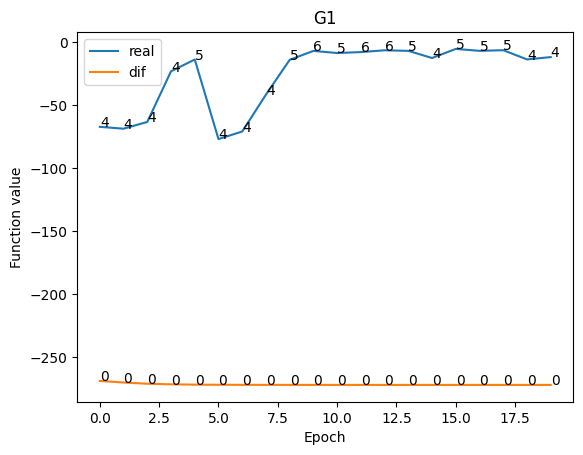

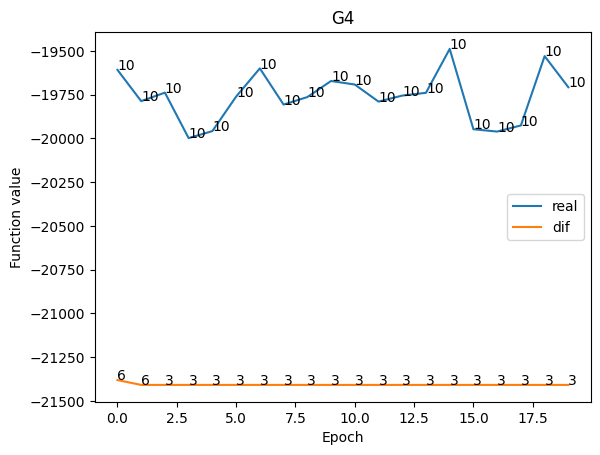

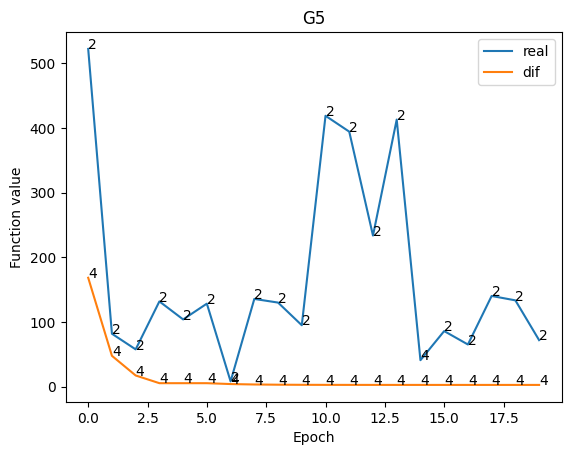

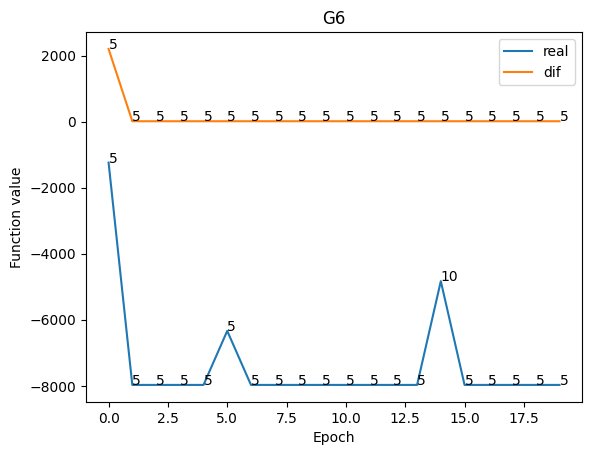

In [12]:
fig1, ax1 = plt.subplots()
ax1.plot(x1)
ax1.plot(y1)
ax1.set_title("G1")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Function value")
ax1.legend(["real","dif"])

for i, txt in enumerate(calx1):
    ax1.annotate(int(txt*10), (i, x1[i]))
for i, txt in enumerate(caly1):
    ax1.annotate(int(txt*10), (i, y1[i]))

fig2, ax2= plt.subplots() # two axes on figure
ax2.plot(x2)
ax2.plot(y2)
ax2.set_title("G4")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Function value")
ax2.legend(["real","dif"])

for i, txt in enumerate(calx2):
    ax2.annotate(int(txt*10), (i, x2[i]))
for i, txt in enumerate(caly2):
    ax2.annotate(int(txt*10), (i, y2[i]))

fig3, ax3 = plt.subplots() # two axes on figure
ax3.plot(x3)
ax3.plot(y3)
ax3.set_title("G5")
ax3.set_xlabel("Epoch")
ax3.set_ylabel("Function value")
ax3.legend(["real","dif"])

for i, txt in enumerate(calx3):
    ax3.annotate(int(txt*10), (i, x3[i]))
for i, txt in enumerate(caly3):
    ax3.annotate(int(txt*10), (i, y3[i]))

fig4, ax4 = plt.subplots() # two axes on figure
ax4.plot(x4)
ax4.plot(y4)
ax4.set_title("G6")
ax4.set_xlabel("Epoch")
ax4.set_ylabel("Function value")
ax4.legend(["real","dif"])

for i, txt in enumerate(calx4):
    ax4.annotate(int(txt*10), (i, x4[i]))
for i, txt in enumerate(caly4):
    ax4.annotate(int(txt*10), (i, y4[i]))

In [64]:
def Layeb05(x):
  return math.log(abs(math.sin(x[0] - math.pi/2)  + math.cos(x[1] - math.pi)) + .001)/(abs(math.cos(2*x[0] - x[1] + math.pi/2))+1)

def Layeb10(x):
  return (math.log(x[0]**2 + x[1]**2 + .5)**2) + abs(100*math.sin(x[0] - x[1]))

def Layeb15(x):
  return (10*(math.tanh(2*abs(x[0]) - x[1]**2 - 1)**(1/2)) + abs(math.e**(x[0]*x[1] + 1)-1)).real

def Layeb20(x):
  value = 0
  for i in range(2):
    value += (random.randint(0,100)**i) * (x[i] - 1)**2
  return value

In [111]:
swarm1 = []
swarm2 = []
swarm3 = []
swarm4 = []
real1 = []
dif1 = []
real2 = []
dif2 = []
real3 = []
dif3 = []
real4 = []
dif4 = []

for i in range(30):
    swarm_history1 = swarm(Layeb05, 100, 2, 100, [-10,-10],[10,10])
    swarm_history2 = swarm(Layeb10, 100, 2, 100, [-100,-100],[100,100])
    swarm_history3 = swarm(Layeb15, 100, 2, 100, [-10,-10],[10,10])
    swarm_history4 = swarm(Layeb20, 100, 2, 100, [-5,-5], [5,5])

    Real_history1 = Real(Layeb05, placeholder, 100, 2, 100, [-10,-10],[10,10])
    Real_history2 = Real(Layeb10, placeholder, 100, 2, 100, [-100,-100],[100,100])
    Real_history3 = Real(Layeb15, placeholder, 100, 2, 100, [-10,-10],[10,10])
    Real_history4 = Real(Layeb20, placeholder, 100, 2, 100, [-5,-5], [5,5])

    Dif_history1 = DifferentialEvolution(Layeb05, placeholder, 100, 2, 100, [-10,-10],[10,10])
    Dif_history2 = DifferentialEvolution(Layeb10, placeholder, 100, 2, 100, [-100,-100],[100,100])
    Dif_history3 = DifferentialEvolution(Layeb15, placeholder, 100, 2, 100, [-10,-10],[10,10])
    Dif_history4 = DifferentialEvolution(Layeb20, placeholder, 100, 2, 100, [-5,-5], [5,5])

    x1 = sorted(Real_history1, key = lambda x: x[1], reverse=True)
    y1 = sorted(Dif_history1, key = lambda x: x[1], reverse=False)

    x2 = sorted(Real_history2, key = lambda x: x[1], reverse=True)
    y2 = sorted(Dif_history2, key = lambda x: x[1], reverse=False)

    x3 = sorted(Real_history3, key = lambda x: x[1], reverse=True)
    y3 = sorted(Dif_history3, key = lambda x: x[1], reverse=False)

    x4 = sorted(Real_history4, key = lambda x: x[1], reverse=True)
    y4 = sorted(Dif_history4, key = lambda x: x[1], reverse=False)

    z1 = sorted(swarm_history1, key = lambda x: x[1])
    z2 = sorted(swarm_history2, key = lambda x: x[1])
    z3 = sorted(swarm_history3, key = lambda x: x[1])
    z4 = sorted(swarm_history4, key = lambda x: x[1])

    swarm1.append(swarm_history1)
    swarm2.append(swarm_history2)
    swarm3.append(swarm_history3)
    swarm4.append(swarm_history4)

    real1.append(Real_history1)
    real2.append(Real_history2)
    real3.append(Real_history3)
    real4.append(Real_history4)

    dif1.append(Dif_history1)
    dif2.append(Dif_history2)
    dif3.append(Dif_history3)
    dif4.append(Dif_history4)


#print("Best result of Layeb05:\n", "Swarm:\n", "\tFunction Result: ", sorted(z1)[0], " mean: ", np.mean(z1), " std: ", np.std(z1), "\n")
#print("Best result of Layeb10:\n", "Swarm:\n", "\tFunction Result: ", sorted(z2)[0], " mean: ", np.mean(z2), " std: ", np.std(z2), "\n")
#print("Best result of Layeb15:\n", "Swarm:\n", "\tFunction Result: ", sorted(z3)[0], " mean: ", np.mean(z3), " std: ", np.std(z3), "\n")
#print("Best result of Layeb20:\n", "Swarm:\n", "\tFunction Result: ", sorted(z4)[0], " mean: ", np.mean(z4), " std: ", np.std(z4), "\n")

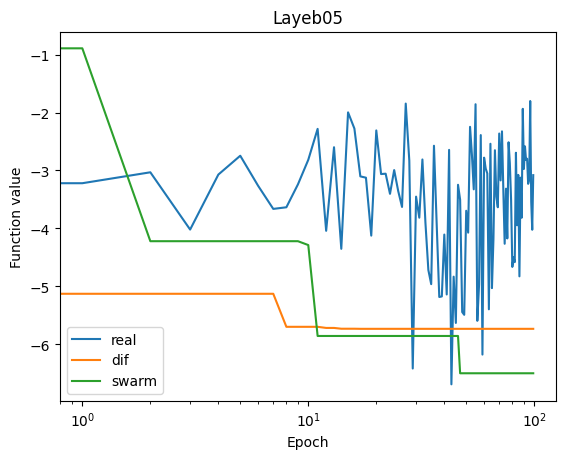

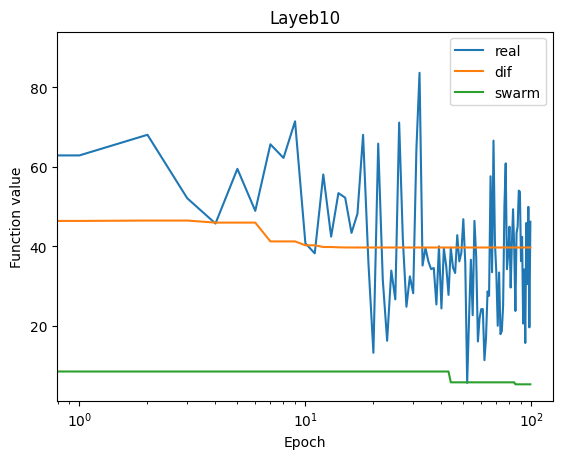

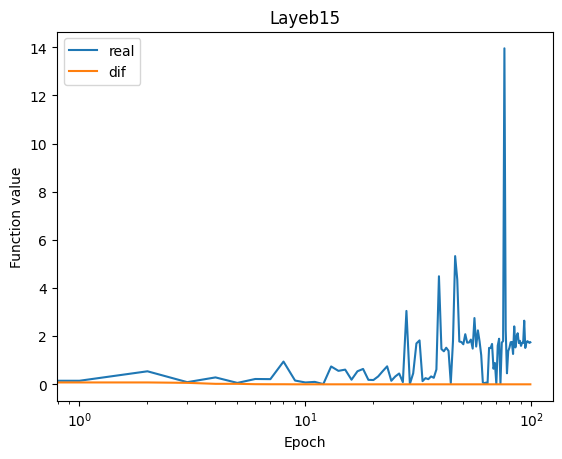

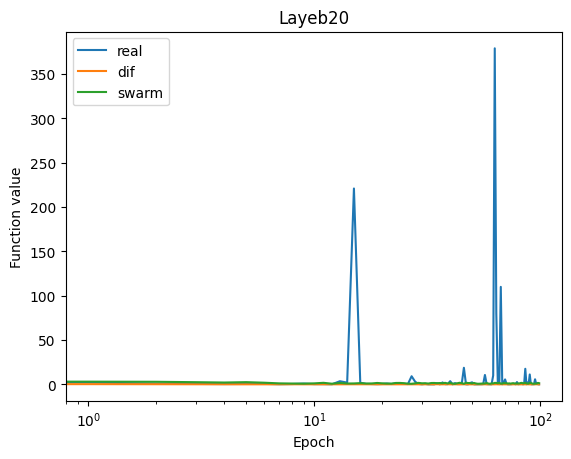

In [115]:
z1 = list(map(lambda x: x[1],swarm1[3]))
z2 = list(map(lambda x: x[1],swarm2[3]))
z3 = list(map(lambda x: x[1],swarm3[3]))
z4 = list(map(lambda x: x[1],swarm4[3]))

x1 = list(map(lambda x: x[3],real1[3]))
x2 = list(map(lambda x: x[3],real2[3]))
x3 = list(map(lambda x: x[3],real3[3]))
x4 = list(map(lambda x: x[3],real4[3]))

y1 = list(map(lambda x: x[1],dif1[3]))
y2 = list(map(lambda x: x[1],dif2[3]))
y3 = list(map(lambda x: x[1],dif3[3]))
y4 = list(map(lambda x: x[1],dif4[3]))

fig1, ax1 = plt.subplots()
ax1.plot(x1)
ax1.plot(y1)
ax1.plot(z1)
ax1.set_xscale('log')
ax1.set_title("Layeb05")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Function value")
ax1.legend(["real","dif","swarm"])


fig2, ax2= plt.subplots() # two axes on figure
ax2.plot(x2)
ax2.plot(y2)
ax2.plot(z2)
ax2.set_xscale('log')
ax2.set_title("Layeb10")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Function value")
ax2.legend(["real","dif","swarm"])


fig3, ax3 = plt.subplots() # two axes on figure
ax3.plot(x3)
ax3.plot(y3)
ax4.plot(z3)
ax3.set_xscale('log')
ax3.set_title("Layeb15")
ax3.set_xlabel("Epoch")
ax3.set_ylabel("Function value")
ax3.legend(["real","dif","swarm"])

fig4, ax4 = plt.subplots() # two axes on figure
ax4.plot(x4)
ax4.plot(y4)
ax4.plot(z4)
ax4.set_xscale('log')
ax4.set_title("Layeb20")
ax4.set_xlabel("Epoch")
ax4.set_ylabel("Function value")
ax4.legend(["real","dif","swarm"])

